In [45]:
from isbtchot.model import btc_historical_daily
import matplotlib.pyplot as plt

In [46]:
# Aux functions

def get_cagr(df):
    # Filter out the relevant entries, assuming that the last and the first are the ones we're interested in for CAGR
    # This is based on the structure of the DataFrame provided by the user
    start_price = df.iloc[0]['close']
    end_price = df.iloc[-1]['close']
    start_time = df.iloc[0]['time']
    end_time = df.iloc[-1]['time']

    # Calculate the number of years between the start and end dates
    years = (end_time - start_time).days / 365.25

    # Calculate the geometric mean of the annual growth rate
    # The geometric mean will be the nth root of the total growth ratio, where n is the number of years
    # CAGR = (End Value / Start Value)^(1/n) - 1
    cagr = (end_price / start_price) ** (1 / years) - 1

    return f"{cagr * 100:.2f}%"

def get_mean_and_median(series):
    return f"""Mean: {series.mean():.2f}%, Median: {series.median():.2f}%"""

def create_hist(series):
    # Plot the histogram with a logarithmic scale on the y-axis
    plt.figure(figsize=(10, 6))
    plt.hist(
        series, 
        bins=50, 
        #log=True
    )
    plt.xlabel('Yearly Return (%)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Bitcoin Yearly Returns 70th percentile')
    plt.grid(True)
    plt.show()

In [47]:
df = btc_historical_daily().reset_index()[["time","close"]].iloc[:]

In [48]:
get_cagr(df)

'177.10%'

In [49]:
# First, we need to ensure the dataframe is sorted by date in ascending order
df = df.sort_values('time')

# Calculate yearly returns, assuming a 365 trading year
yearly_returns = df['close'].pct_change(periods=365).dropna() * 100

# Calculate
get_mean_and_median(yearly_returns)

'Mean: 650.60%, Median: 118.48%'

In [50]:
count = int(len(yearly_returns) * 0.7)
removed_top_performing = yearly_returns.nsmallest(count)
get_mean_and_median(removed_top_performing)


'Mean: 56.27%, Median: 36.68%'

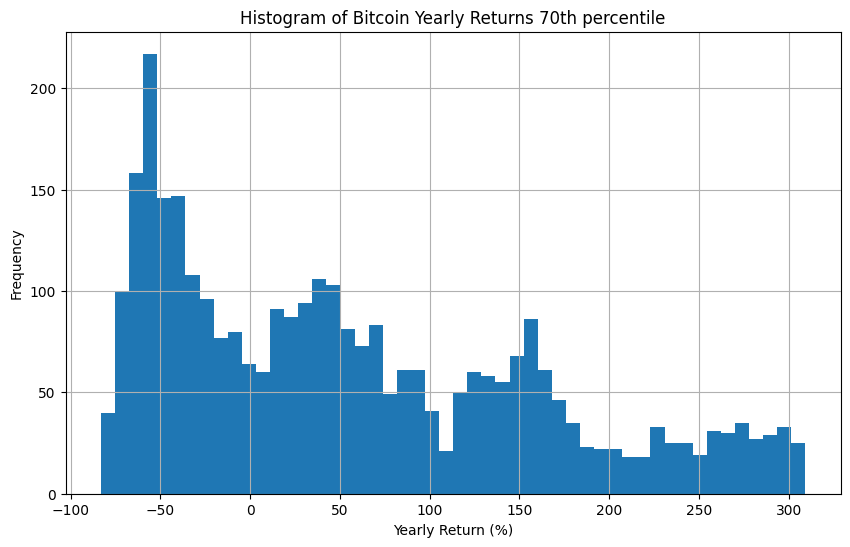

In [51]:
create_hist(removed_top_performing)

In [52]:
total = len(yearly_returns)
positive = sum( 10 < yearly_returns)

positive / total 

0.717022682228584